# 数字识别

    项目来源：kaggle：Digit Recognizer
    
    实现识别手写数字图片模型


## 一、读入数据
    数据连接：https://www.kaggle.com/c/digit-recognizer/data


In [1]:
#导入需要库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

train_data_path = "./train.csv"
test_data_path = "./test.csv"

In [2]:
#载入数据
df_train_data = pd.read_csv(train_data_path)
df_test_data = pd.read_csv(test_data_path)
print("train data has {} data points with {} variables each.".format(*df_train_data.shape))
print("test data has {} data points with {} variables each.".format(*df_test_data.shape))
display(df_train_data.head(n=1))
display(df_test_data.head(n=1))

train data has 42000 data points with 785 variables each.
test data has 28000 data points with 784 variables each.


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 二、可视化部分digit数据生成

In [3]:
#截取训练集lable、然后将dataframe数据转换成ndarry数据
df_train_labels = df_train_data['label']
train_labels = np.array(df_train_labels)
df_train_features = df_train_data.drop(['label'], axis=1)
train_datas = np.array(df_train_features)
test_datas = np.array(df_test_data)

In [4]:
print(train_datas.shape)
print(test_datas.shape)

(42000, 784)
(28000, 784)


显示部分digit图片

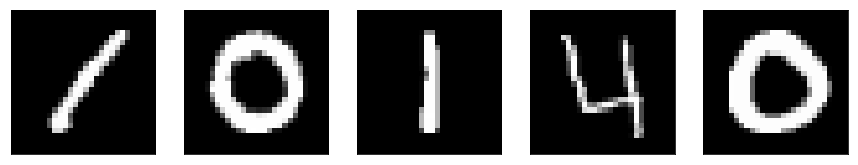

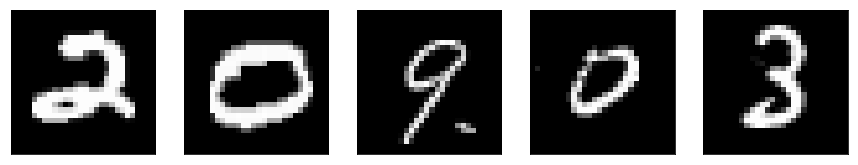

In [5]:
import math
from PIL import Image

def display_digit(np_datas):
    fig = plt.figure(figsize=(15, 3 * math.ceil(len(np_datas)/5)))
    for i,img in enumerate(np_datas):
        img = img.reshape(28,28)
        img = Image.fromarray(np.uint(img))#将数组转换为图片
        ax = fig.add_subplot(math.ceil(len(np_datas)/5),5,i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img)
    plt.show()
    
import random
random.seed(2018)
display_digit(train_datas[:5])
display_digit(test_datas[:5])

## 三、实现预处理函数

### 标准化

在下面的单元中，实现 `normalize` 函数，传入图片数据 `x`，并返回标准化 Numpy 数组。值应该在 0 到 1 的范围内（含 0 和 1）。返回对象应该和 `x` 的形状一样。


In [6]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (28, 28, 1)
    : return: Numpy array of normalize data
    """
    x = np.array(x) /255
    return  x.reshape(x.shape[0],28,28,1)


train_X = normalize(train_datas)
test_X = normalize(test_datas)

In [7]:
print(train_X.shape)
print(test_X.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


### One-hot 编码

输入`x`，是一个标签列表。实现该函数，以返回为 one_hot 编码的 Numpy 数组的标签列表。标签的可能值为 0 到 9。每次调用 `one_hot_encode` 时，对于每个值，one_hot 编码函数应该返回相同的编码。确保将编码映射保存到该函数外面。


In [8]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    one_hot_lables = lb.transform(np.array(x))
    return one_hot_lables

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([i for i in range(10)]))

train_y = one_hot_encode(train_labels)

In [9]:
print(train_y.shape)

(42000, 10)


### 随机化数据
对数据集随机化处理，防止前n个数据为同一数字，不利于模型训练

In [10]:
train_shuffle = list(zip(train_X, train_y))
random.Random(2018).shuffle(train_shuffle)
train_X, train_y = zip(*train_shuffle)

In [11]:
train_X = np.array(train_X)
train_y = np.array(train_y)
print(type(train_X))
print(type(train_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 构建网络

In [12]:
from keras.layers import Conv2D,MaxPooling2D,Input, GlobalAveragePooling2D,Dropout,concatenate,add,Dense
from keras.models import Model

input_img = Input(shape=(28,28,1))
tower1_1 = Conv2D(32,(1,1), padding='same', activation='relu')(input_img)
tower1_1 = Conv2D(32,(3,3), padding='same', activation='relu')(tower1_1)
tower1_2 = Conv2D(32,(1,1), padding='same', activation='relu')(input_img)
tower1_2 = Conv2D(32,(5,5), padding='same', activation='relu')(tower1_2)
tower1_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower1_3 = Conv2D(32, (1,1), padding='same', activation='relu')(tower1_3)
inception1 = concatenate([tower1_1, tower1_2, tower1_3], axis=-1)
output1 = add([input_img, inception1])

tower2_1 = Conv2D(64,(1,1), padding='same', activation='relu')(output1)
tower2_1 = Conv2D(64,(3,3), padding='same', activation='relu')(tower2_1)
tower2_2 = Conv2D(64,(1,1), padding='same', activation='relu')(output1)
tower2_2 = Conv2D(64,(5,5), padding='same', activation='relu')(tower2_2)
tower2_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(output1)
tower2_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower2_3)
inception2 = concatenate([tower2_1, tower2_2, tower2_3], axis=-1)
output2 = add([input_img, inception2])

output = GlobalAveragePooling2D()(output2)

output = Dense(1024, activation='relu')(output)

output = Dropout(0.5)(output)

predictions = Dense(10, activation='softmax')(output)

model = Model(inputs=input_img, outputs = predictions)
model.summary()


Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (

## 训练神经网络

### 回调函数
history用于记录训练过程中train_loss和val_loss，earlyStopping用于当检测值不在改善时终止训练

In [13]:
from keras import callbacks
class LossHistory(callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        
    def on_train_begin(self,logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.epoch = 0
    
    def on_epoch_begin(self, batch, logs={}):
        self.epoch += 1
    
    def on_epoch_end(self, btch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        model.save('digit_recognizer_epoch{}.h5'.format(self.epoch))
        
history = LossHistory()
earlyStopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

### 训练loss、acc变化曲线函数

In [14]:
import matplotlib.pyplot as plt
def show_loss_and_acc(title_name):
    plt.figure(figsize=(15,4))
    loss = history.losses
    val_loss = history.val_losses
    plt.subplot(1,2,1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Trend: '+ title_name)
    plt.plot(loss, 'blue', label='Training Loss')
    plt.plot(val_loss, 'green', label='Validation Loss')
    plt.xticks(range(0, history.epoch),range(1, history.epoch+1))
    plt.legend()

    
    acc = history.acc
    val_acc = history.val_acc
    plt.subplot(1,2,2)
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.title('acc Trend: ' + title_name)
    plt.plot(acc, 'blue', label='Training acc')
    plt.plot(val_acc, 'green', label='Validation acc')
    plt.xticks(range(0, history.epoch), range(1, history.epoch+1))
    plt.legend()
    plt.show()

### 设置超参

In [15]:
epochs = 100
batch_size = 64

In [16]:
model.compile(optimizer='Adam',              
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_X, y=train_y, batch_size=batch_size, epochs=epochs, callbacks=[history, earlyStopping], validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 1671s 50ms/step - loss: 1.3169 - acc: 0.5122 - val_loss: 0.5772 - val_acc: 0.8256
Epoch 2/100
33600/33600 [==============================] - 1711s 51ms/step - loss: 0.4181 - acc: 0.8690 - val_loss: 0.2992 - val_acc: 0.9096
Epoch 3/100
33600/33600 [==============================] - 1666s 50ms/step - loss: 0.2905 - acc: 0.9095 - val_loss: 0.2701 - val_acc: 0.9132
Epoch 4/100
33600/33600 [==============================] - 1669s 50ms/step - loss: 0.2298 - acc: 0.9280 - val_loss: 0.1966 - val_acc: 0.9410
Epoch 5/100
33600/33600 [==============================] - 1774s 53ms/step - loss: 0.2033 - acc: 0.9354 - val_loss: 0.1733 - val_acc: 0.9458
Epoch 6/100
33600/33600 [==============================] - 1661s 49ms/step - loss: 0.1809 - acc: 0.9431 - val_loss: 0.1574 - val_acc: 0.9529
Epoch 7/100
33600/33600 [==============================] - 1648s 49ms/step - loss: 0.1630 - acc: 0.9509 -

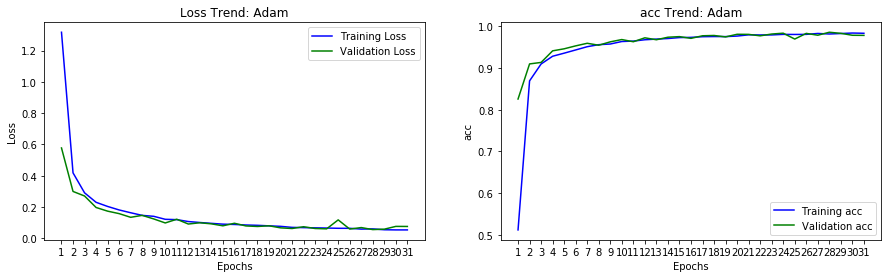

In [17]:
show_loss_and_acc("Adam")

平滑收敛，且在28个epoch后val_loss最低，载入digit_recognizer_epoch28.h5对测试集进行预测


## 测试模型

利用在验证集上表现最佳的epoch对应的模型对测试集进行预测，这将是最终的准确率。

In [45]:
#导入load_model
from keras.models import load_model
df = pd.read_csv("sample_submission.csv")
model_list = ["digit_recognizer_epoch28.h5"]

In [56]:
for model_name in model_list:
    del model
    model = load_model(model_name)
    predictions_test = model.predict(test_X)
    for i in range(predictions_test.shape[0]):
        pre = list(predictions_test[i])
        df.at[i, 'Label'] = pre.index(max(pre))
    df.to_csv('pred_'+ (model_name.split('.')[0] +'.csv'), index=None)

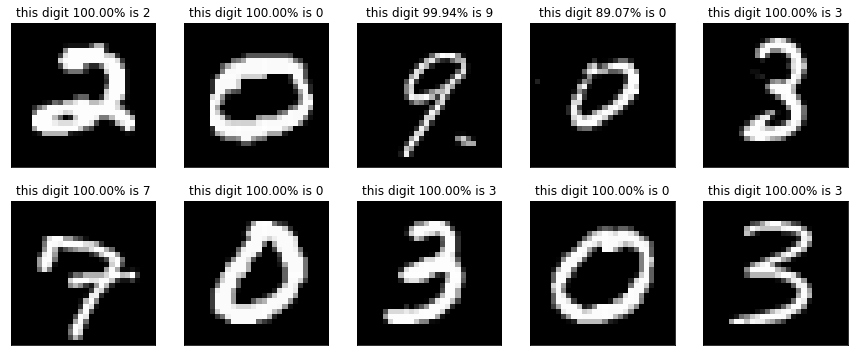

In [60]:
def display_pred_digit(np_datas):
    X = normalize(np_datas)
    pred_y = model.predict(X)
    fig = plt.figure(figsize=(15, 3 * math.ceil(len(np_datas)/5)))
    for i,img in enumerate(np_datas):
        img = img.reshape(28,28)
        img = Image.fromarray(np.uint(img))#将数组转换为图片
        ax = fig.add_subplot(math.ceil(len(np_datas)/5),5,i+1)
        pre = list(pred_y[i])
        ax.set_title("this digit {:.2f}% is {}".format(max(pre) * 100, pre.index(max(pre))))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(img)
    plt.show()
    
dis_pred_digit_np = test_datas[:10]
display_pred_digit(dis_pred_digit_np)